INVERSEEEE


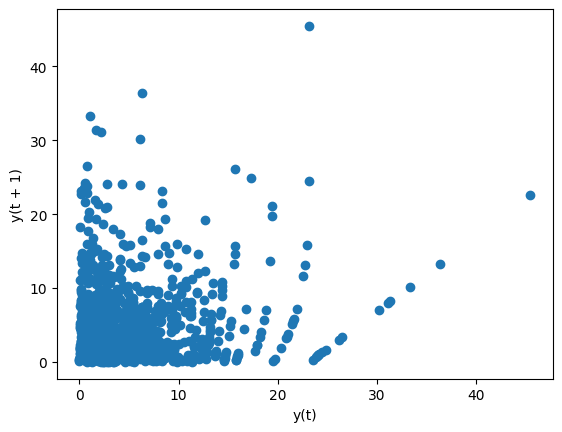

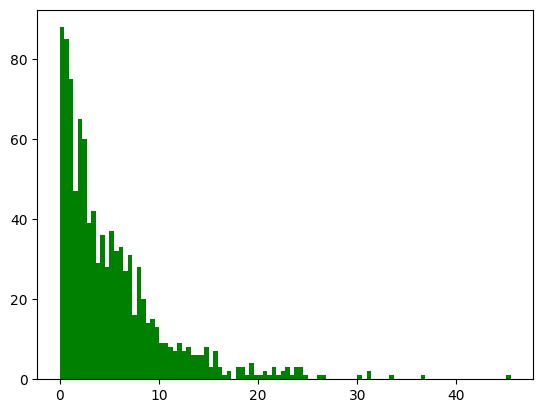

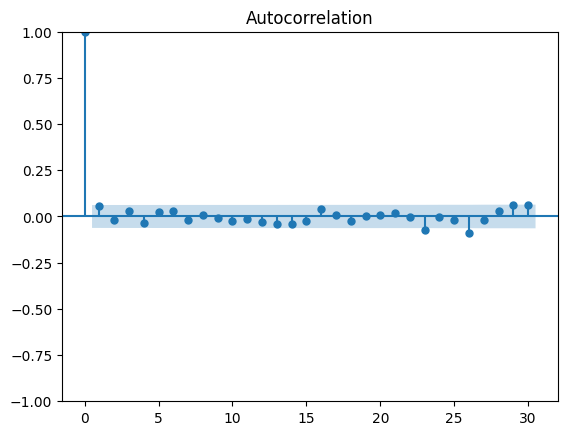

COMPOSITION


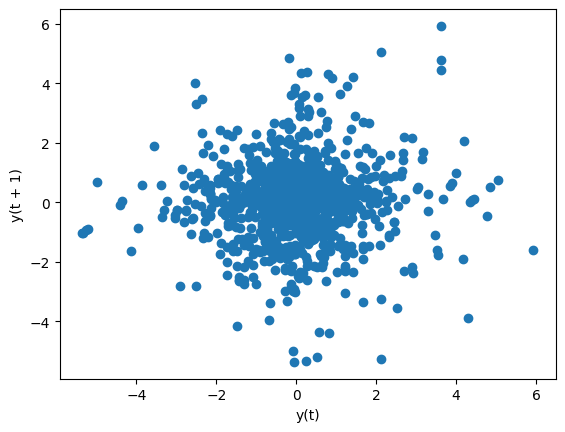

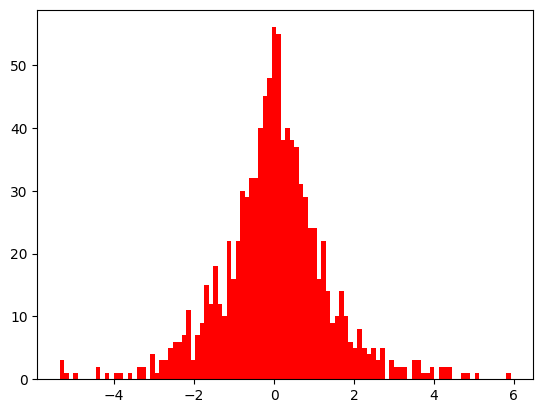

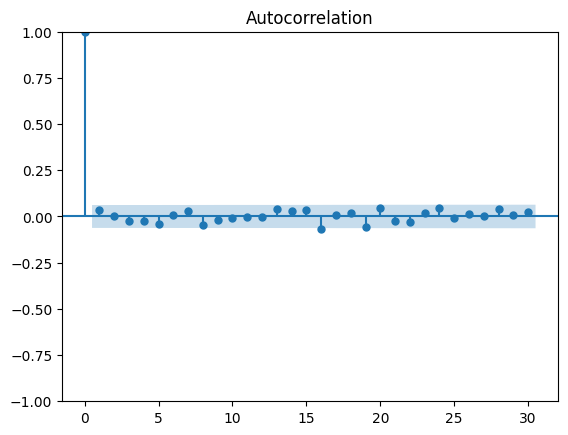

In [115]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

def linearCongruentialMethod(p_seed, p_m, p_a, p_c, p_noOfRandomNums, p_precision):
    p_randomNums = []
    p_already_seen = [-1] * (p_noOfRandomNums)
    p_temp = ((p_seed * p_a) + p_c) % p_m
    p_randomNums.append(round(p_temp / p_m, p_precision))
    for i in range(1, p_noOfRandomNums):
        p_temp = ((p_temp * p_a) + p_c) % p_m
        p_randomNums.append(round(p_temp / p_m, p_precision))
        if p_randomNums[i] not in p_already_seen:
            p_already_seen[i] = p_randomNums[i]
        else:
            print("REPEAT AT = ", i)
            break
    return p_randomNums

def inversTransformation(randomNums, precision):
    inverse_variate = []
    b = 5.372093023
    for i in range(0, len(randomNums), 1):
        x = -b * np.log(1 - randomNums[i])
        inverse_variate.append(round(x, precision))
        # print(inverse_variate[i])
    return inverse_variate

def generateUniform(p_randomNums, p_precision):
    p_uniform_variate = []
    p_avg = 24.39534884
    for i in range(0, len(p_randomNums), 1):
        p_x = (2 * p_avg * p_randomNums[i])
        p_uniform_variate.append(round(p_x, p_precision))
        # print(uniform_variate[i])
    return p_uniform_variate

def generateKomposisi(p_randomNums, p_precision):
    komposisi_variate = []
    u1 = linearCongruentialMethod(42069, m, a, c, noOfRandomNums, p_precision)
    u2 = linearCongruentialMethod(69420, m, a, c, noOfRandomNums, p_precision)
    for i in range(0, len(p_randomNums), 1):
        if u1[i] <= 0.5:
            x = np.log(u2[i])
        else:
            x = -np.log(u2[i])
        komposisi_variate.append(round(x, precision))
        # print(u1[i])
        # print(u2[i])
        # print(komposisi_variate[i])
    return komposisi_variate

seed = 12345
m = 2**16 + 1    # Modulus parameter
a = 75        # Multiplier term
c = 74        # Increment term
precision = 5
noOfRandomNums = 10**3
randomNums = linearCongruentialMethod(seed, m, a, c, noOfRandomNums, precision)
for i in range(0, randomNums.__len__(), 1):
    # print(randomNums[i])
    pass

inverse_variate = inversTransformation(randomNums, precision)
# uniform_variate = generateUniform(randomNums, precision)
komposisi_variate = generateKomposisi(randomNums, precision)

print("INVERSEEEE")
data_lcg = pd.DataFrame(inverse_variate)
data_lcg.to_csv("data_lcg_variate_1.csv")
pd.plotting.lag_plot(data_lcg)      # ScatterPlot
plt.show()
plt.hist(data_lcg, bins=100, color="green")                  # Histogram
plot_acf(data_lcg)                  # AutoCorrelation
plt.show()

print("COMPOSITION")
data_lcg = pd.DataFrame(komposisi_variate)
data_lcg.to_csv("data_lcg_composition_1.csv")
pd.plotting.lag_plot(data_lcg)      # ScatterPlot
plt.show()
plt.hist(data_lcg, bins=100, color="red")                  # Histogram
plot_acf(data_lcg)                  # AutoCorrelation
plt.show()


In [42]:
import numpy as np
import random


x = 0.123456789
print(x)
x = np.array(x)
np.resize(x, (1, 4))
print(x)
for i in range(0, 10*4):
    # print(random.random())
    pass

0.123456789
0.123456789
